In [114]:
np.random.seed(102030)
mu = np.array([5, 2, 1])
cov = np.array([[1, 0.4, 0], [0.4, 1.5, 0], [0, 0, 2]])
N = 20
x1, x2, x3 = np.random.multivariate_normal(mu, cov, N).T

In [115]:
x1

array([4.36374315, 4.78005043, 4.94450806, 5.84325979, 5.88522661,
       5.92188098, 4.57082527, 5.06325986, 3.5198066 , 4.11901961,
       5.22283911, 5.57565248, 2.92542633, 5.45094481, 4.85000315,
       5.75498172, 3.60739389, 2.42002217, 5.45026833, 5.74967708])

In [116]:
x2

array([2.20768854, 1.95944174, 2.31057042, 3.76992373, 1.6214196 ,
       2.9105985 , 1.81443434, 3.4012444 , 0.22396532, 2.97843056,
       3.17868247, 1.4708037 , 1.54639316, 1.06150187, 2.15154362,
       1.16128924, 1.34093718, 0.17975934, 1.28869353, 1.81090254])

In [117]:
x3

array([ 4.7923386 ,  0.19442543,  0.68006288,  0.20265144,  2.43798989,
        1.62120249,  0.91044842, -1.03317302,  1.29333433,  0.89976909,
        2.84084466,  1.02155662,  0.96832803, -1.42269635,  1.94078026,
        2.58317303,  0.05871876,  0.05491707, -0.3032869 , -0.97248063])

In [118]:
b = 5
c = 3

x_1 = x1
x_2 = np.dot(b, x2)
x_3 = np.dot(c, x3)
epsilon = np.random.normal(size=20)

ans=0
for i, j, k in zip(x_1, x_2, x_3):
    ans = 10 + i + j + k + epsilon
print(ans)

[21.37079885 20.70187859 21.77171235 21.70828109 20.88367959 20.77186839
 22.84779021 21.57692015 21.27575571 22.00768464 21.81867369 23.23260999
 21.98384252 22.39241745 23.13040914 21.16095041 21.1294466  20.71343248
 20.90381482 21.55640526]


In [119]:
B = 1000
N = 20

bootstrap_data = []

for b in range(B):
    
    indices = np.random.choice(N, N, replace=True)
    
    x1_bs, x2_bs, ans_bs = resample(x1, x2, ans, replace=True, n_samples=20)
    
    x_1 = x1_bs[indices]
    x_2 = x2_bs[indices]
    y_b = ans_bs[indices]
    bootstrap_data.append([x_1,x_2,y_b]) 
    
bootstrap_data[999]

[array([4.94450806, 4.94450806, 5.45026833, 4.94450806, 4.57082527,
        4.94450806, 4.57082527, 5.45026833, 4.94450806, 5.45026833,
        5.06325986, 4.57082527, 5.45094481, 5.06325986, 5.22283911,
        2.42002217, 3.5198066 , 4.94450806, 4.57082527, 5.88522661]),
 array([2.31057042, 2.31057042, 1.28869353, 2.31057042, 1.81443434,
        2.31057042, 1.81443434, 1.28869353, 2.31057042, 1.28869353,
        3.4012444 , 1.81443434, 1.06150187, 3.4012444 , 3.17868247,
        0.17975934, 0.22396532, 2.31057042, 1.81443434, 1.6214196 ]),
 array([21.77171235, 21.77171235, 20.90381482, 21.77171235, 22.84779021,
        21.77171235, 22.84779021, 20.90381482, 21.77171235, 20.90381482,
        21.57692015, 22.84779021, 22.39241745, 21.57692015, 21.81867369,
        20.71343248, 21.27575571, 21.77171235, 22.84779021, 20.88367959])]

In [120]:
from sklearn.linear_model import LinearRegression

def boot_fn2(x1,x2,y):
        
    X = np.stack((x1, x2), axis=1)
    m = LinearRegression(fit_intercept=True).fit(X,y)
    
    return m.intercept_, m.coef_

In [121]:
coef_list = []
for b in range(B):

    coef_list.append(boot_fn2(bootstrap_data[b][0],bootstrap_data[b][1],bootstrap_data[b][2]))

In [122]:
#b0

b_0 = []
b_1 = []
b_2 = []

for b in range(B):

    b_0.append(coef_list[b][0])
    b_1.append(coef_list[b][1][0])
    b_2.append(coef_list[b][1][1])

In [123]:
b0_me = np.array(b_0).mean()
b0_std = np.array(b_0).std()

b1_me = np.array(b_1).mean()
b1_std = np.array(b_1).std()

b2_me = np.array(b_2).mean()
b2_std = np.array(b_2).std()

print('b0 estimate & se:', b0_me, b0_std)
print('b1 estimate & se:', b1_me, b1_std)
print('b2 estimate & se:', b2_me, b2_std)

b0 estimate & se: 21.565428044672853 1.3384644091439393
b1 estimate & se: -0.008622518246532086 0.28732451093169653
b2 estimate & se: 0.08517645753041282 0.2603670934219475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


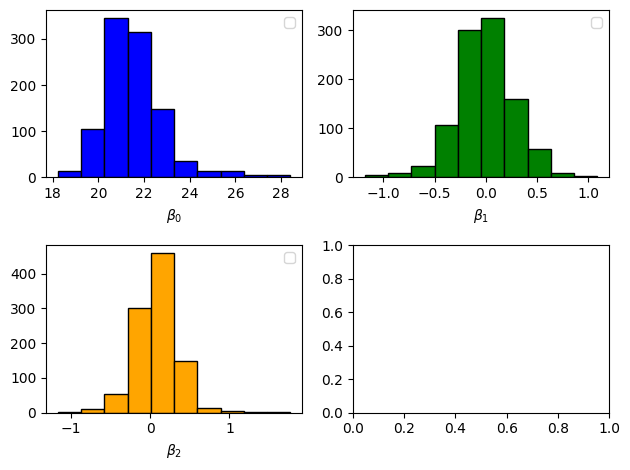

In [124]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#set a subplot figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors=['blue']
names=['Beta_0']
ax0.hist([b_0], bins = 10, color=colors,edgecolor='black')
ax0.legend(prop={'size': 10})
ax0.set_xlabel(r'$\beta_{0}$')

colors=['green']
names=['Beta_1']
ax1.hist([b_1], bins = 10, color=colors,edgecolor='black')
ax1.legend(prop={'size': 10})
ax1.set_xlabel(r'$\beta_{1}$')

colors=['orange']
names=['Beta_2']
ax2.hist([b_2], bins = 10, color=colors,edgecolor='black')
ax2.legend(prop={'size': 10})
ax2.set_xlabel(r'$\beta_{2}$')

fig.tight_layout()
plt.show()

In [125]:
np.random.seed(102030)
mu = np.array([5, 2, 1])
cov = np.array([[1, 0.4, 0], [0.4, 1.5, 0], [0, 0, 2]])
N = 1000
x11, x22, x33 = np.random.multivariate_normal(mu, cov, N).T

In [126]:
b = 5
c = 3

x101 = x11
x202 = np.dot(b, x22)
x303 = np.dot(c, x33)
epsilon = np.random.normal(size=1000)

anss = 0

for i, j, k in zip(x101, x202, x303):
    
    anss = 10 + i + j + k + epsilon

In [127]:
B = 1000
N = 20

bootstrap_data2 = []

for b in range(B):
    
    indices = np.random.choice(N, N, replace=True)
    
    x1_bs, x2_bs, ans_bs = resample(x101, x202, anss, replace=True, n_samples=1000)
    
    xx1 = x1_bs[indices]
    xx2 = x2_bs[indices]
    yyb = ans_bs[indices]
    bootstrap_data2.append([xx1,xx2,yyb]) 

In [128]:
bootstrap_data2[999]

[array([4.55436068, 6.27383617, 3.31955654, 6.27383617, 3.7037587 ,
        3.61293893, 5.0814203 , 3.31955654, 3.32309186, 3.61293893,
        4.91926121, 6.27383617, 4.4750466 , 3.32309186, 3.31955654,
        3.61293893, 6.27383617, 4.53185395, 5.0814203 , 3.31955654]),
 array([ 8.96917843, 22.09275025, 16.1238491 , 22.09275025, 10.08982448,
         8.16337428, 18.10309984, 16.1238491 , -4.92615148,  8.16337428,
         5.04042304, 22.09275025,  4.91704707, -4.92615148, 16.1238491 ,
         8.16337428, 22.09275025, 23.07055015, 18.10309984, 16.1238491 ]),
 array([24.77880398, 23.66173979, 22.4246014 , 23.66173979, 22.89817221,
        22.95138413, 23.05254472, 22.4246014 , 23.39069908, 22.95138413,
        21.5562368 , 23.66173979, 22.97616066, 23.39069908, 22.4246014 ,
        22.95138413, 23.66173979, 22.15799115, 23.05254472, 22.4246014 ])]

In [129]:
coef_list2 = []
for b in range(B):

    coef_list2.append(boot_fn3(bootstrap_data2[b][0],bootstrap_data2[b][1],bootstrap_data2[b][2]))

In [130]:
coef_list2[999]

(21.69087460906752, array([ 0.39022535, -0.03043119]))

In [131]:
#b0

b_00 = []
b_11 = []
b_22 = []

for b in range(B):

    b_00.append(coef_list2[b][0])
    b_11.append(coef_list2[b][1][0])
    b_22.append(coef_list2[b][1][1])

In [132]:
b00_me = np.array(b_00).mean()
b00_std = np.array(b_00).std()

b11_me = np.array(b_11).mean()
b11_std = np.array(b_11).std()

b22_me = np.array(b_22).mean()
b22_std = np.array(b_22).std()

print('b0 estimate & se:', b00_me, b00_std)
print('b1 estimate & se:', b11_me, b11_std)
print('b2 estimate & se:', b22_me, b22_std)

b0 estimate & se: 22.831278765656428 0.9225771909971409
b1 estimate & se: -0.0074717953423585805 0.2422684405468664
b2 estimate & se: 0.0004974017554233064 0.03230157943553694


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


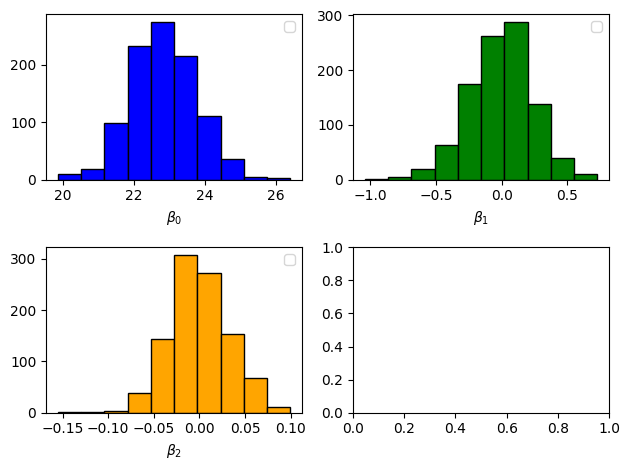

In [133]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#set a subplot figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors=['blue']
names=['Beta_0']
ax0.hist([b_00], bins = 10, color=colors,edgecolor='black')
ax0.legend(prop={'size': 10})
ax0.set_xlabel(r'$\beta_{0}$')

colors=['green']
names=['Beta_1']
ax1.hist([b_11], bins = 10, color=colors,edgecolor='black')
ax1.legend(prop={'size': 10})
ax1.set_xlabel(r'$\beta_{1}$')

colors=['orange']
names=['Beta_2']
ax2.hist([b_22], bins = 10, color=colors,edgecolor='black')
ax2.legend(prop={'size': 10})
ax2.set_xlabel(r'$\beta_{2}$')

fig.tight_layout()
plt.show()

In [150]:
x1x2 = []

for i, j in zip(x1, x2):
    x1x2.append((i+j)/2)

data = {'x1': x1,
        'x2': x2,
        'x3': x1x2,
        'y': ans,
        }

df = pd.DataFrame(data) 

x = df[['x1','x2','x3']]
y = df['y']

x = sm.add_constant(x)

model3 = sm.OLS(y, x).fit() 

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.094
Method:                 Least Squares   F-statistic:                    0.1849
Date:                Mon, 10 Apr 2023   Prob (F-statistic):              0.833
Time:                        15:43:38   Log-Likelihood:                -22.544
No. Observations:                  20   AIC:                             51.09
Df Residuals:                      17   BIC:                             54.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3257      0.889     23.999      0.000      19.451      23.201
x1             0.0053      0.187      0.028      0.978      -0.389       0.400
x2             0.0797      0.195      0.409      0.688      -0.332       0.491
x3             0.0425      0.073      0.582      0.568      -0.112       0.197
==============================================================================
Omnibus:                        2.812   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                2.137
Skew:                           0.784   Prob(JB):                        0.344
Kurtosis:                       2.674   Cond. No.                     1.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Coefficient"] = x.columns

vif

,VIF Score,Coefficient
0,24.059295,const
1,inf,x1
2,inf,x2
3,inf,x3


In [136]:
x1x2 = []

for i, j in zip(x1, x2):
    x1x2.append((i*j))

data2 = {'x1': x1,
        'x2': x2,
        'x3': x1x2,
        'log(y)': np.log(ans)}

df2 = pd.DataFrame(data2) 

xx = df2[['x1','x2','x3']]
yy = df2['log(y)']

xx = sm.add_constant(xx)

model33 = sm.OLS(yy, xx).fit() 

model33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log(y)   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.8932
Date:                Mon, 10 Apr 2023   Prob (F-statistic):              0.466
Time:                        15:26:09   Log-Likelihood:                 40.507
No. Observations:                  20   AIC:                            -73.01
Df Residuals:                      16   BIC:                            -69.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9880      0.062     48.342      0.000       2.857       3.119
x1             0.0169      0.014      1.225      0.238      -0.012       0.046
x2             0.0653      0.041      1.580      0.134      -0.022       0.153
x3            -0.0125      0.008     -1.501      0.153      -0.030       0.005
==============================================================================
Omnibus:                        2.013   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.519
Skew:                           0.653   Prob(JB):                        0.468
Kurtosis:                       2.656   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(xx.values, i) for i in range(xx.shape[1])]
vif["Coefficient"] = xx.columns

vif

,VIF Score,Coefficient
0,59.967507,const
1,3.004833,x1
2,24.130157,x2
3,31.285471,x3


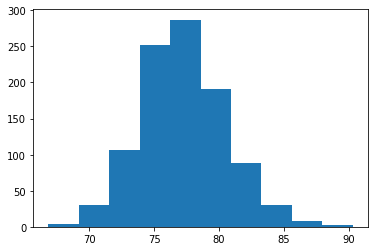

In [175]:
betas = []

for i in range(1000):
    
    y = boot_samples_y[i]
    X = boot_samples_x1[i] + boot_samples_x2[i]
    
    model_b = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

    betas.append(model_b.params)
    
l = [arr.tolist() for arr in betas]

flat = [item for sublist in l for item in sublist]

plt.hist(flat)

In [89]:
nile = sm.datasets.get_rdataset("Nile").data

<Axes: xlabel='time', ylabel='value'>

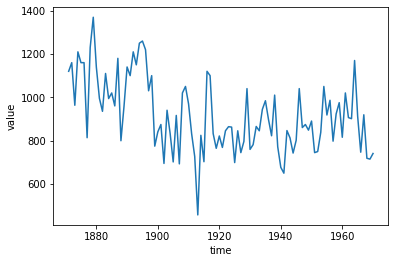

In [70]:
sns.lineplot(x = "time", y = "value", data=nile)

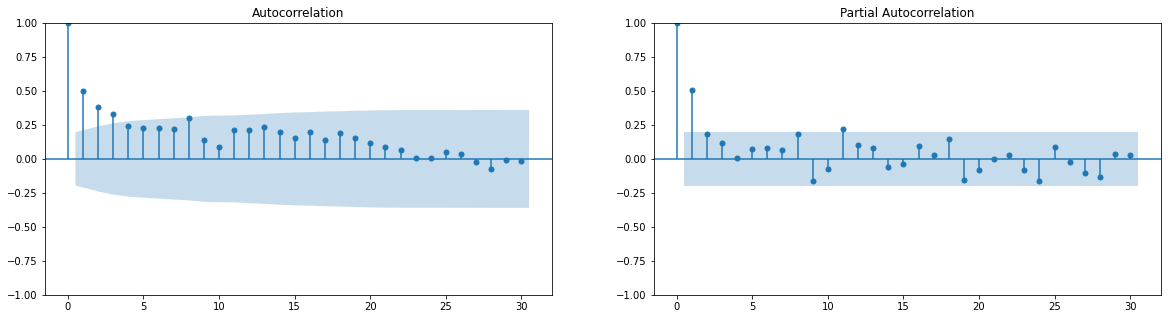

In [104]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sm.graphics.tsa.plot_acf(nile["value"], lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(nile["value"], lags=30, ax=ax[1])
plt.show()

- There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.

- High degree of autocorrelation between adjacent (lag = 1) in PACF plot

- Geometric decay in ACF plot

If | β1 | < 1, the values are mean reverting.

In [136]:
nile_train = nile[nile['time'].between(1871, 1965)]
nile_test = nile[nile['time'].between(1966, 1970)]

In [106]:
ar_1 = AutoReg(nile_train["value"], lags = 1).fit()
ar_2 = AutoReg(nile_train["value"], lags = 2).fit()
ar_3 = AutoReg(nile_train["value"], lags = 3).fit()

In [147]:
forecasts = ar_1.forecast(5).tolist()
test = nile_test["value"].tolist()

MSE = mean_squared_error(test, forecasts)
RMSE = m.sqrt(MSE)

RMSE

171.95890674943806

In [154]:
forecasts

array([917.61789567, 920.39955474, 921.77687245, 922.45884102,
       922.79651266])

In [159]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                   95
Model:                     AutoReg(1)   Log Likelihood                -601.485
Method:               Conditional MLE   S.D. of innovations            145.450
Date:                Wed, 08 Mar 2023   AIC                           1208.969
Time:                        02:11:46   BIC                           1216.599
Sample:                             1   HQIC                          1212.051
                                   95                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.0479     83.703      5.568      0.000     301.994     630.102
value.L1       0.4951      0.089      5.577      0.000       0.321       0.669
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0196           +0.0000j            2.0196            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
bootstrap_data

[(array([ 1.49133728, -0.2262297 ,  0.43925649,  0.43925649,  1.49133728,
          1.49133728,  1.49133728, -0.2262297 , -0.56381057, -0.74491948,
         -0.2262297 ,  1.49133728, -0.2262297 ,  0.43925649, -0.09662424,
          2.68158834, -0.2262297 ,  0.41360363, -0.19577556, -0.56381057]),
  array([ 4.2843483 , -0.94403455,  1.74001384,  1.74001384,  4.2843483 ,
          4.2843483 ,  4.2843483 , -0.94403455, -2.5386798 , -0.53242683,
         -0.94403455,  4.2843483 , -0.94403455,  1.74001384, -1.63091891,
          5.03965182, -0.94403455, -0.24160923, -2.12227701, -2.5386798 ])),
 (array([ 1.0168124 , -0.22567138, -0.28225291, -0.2262297 , -0.06332253,
          0.18651837,  2.68158834,  2.68158834,  0.18651837, -0.1082957 ,
          0.41360363,  1.49133728,  0.07469314, -0.06332253, -0.13653438,
         -0.19577556, -0.28225291, -0.28225291, -0.28225291, -0.06332253]),
  array([ 1.60687601, -0.12461932, -2.27761084, -0.94403455, -1.93416177,
          0.30216278,  5.039651

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import numpy as np
import math as m
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from scipy.stats import bootstrap
from sklearn.utils import resample
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
df = pd.read_csv('/Users/niallj.632/Desktop/BI/2B Forcasting/dataset.csv')

In [11]:
df_var = df.filter(like = 'var')

In [45]:
X, y = df_var, df.target
sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [46]:
log_reg = sm.Logit(y_train, X_train).fit()

y_pred = log_reg.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.232090
         Iterations 8


In [47]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Logistic Regression:  0.8612723617361713


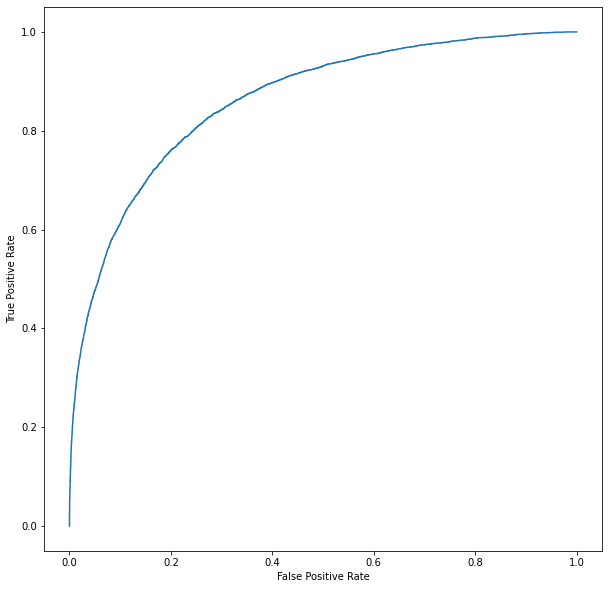

In [48]:
plt.subplots(1, figsize=(10,10))
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
X, y = df_var, df.target

lr = LogisticRegression(penalty='none', random_state = 42, fit_intercept = True)

cvs = cross_val_score(lr, X, y, scoring="roc_auc", cv = 5)

In [54]:
mean_score = cvs.mean()
std_score = cvs.std()

In [55]:
print(mean_score)
print(std_score)
print(cvs)

0.8476929656153205
0.0033664355702840844
[0.84413687 0.84568344 0.84510823 0.85156134 0.85197494]


In [58]:
from sklearn.decomposition import PCA
 
pca20 = PCA(n_components=20)
 
pca_features20 = pca20.fit_transform(X)
 
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', pca_features20.shape)

Shape before PCA:  (200000, 200)
Shape after PCA:  (200000, 20)


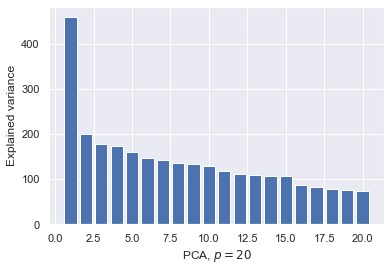

In [59]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca20 = PCA(n_components=20)
 
# Fit and transform data
pca20.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca20.explained_variance_)+1),
    pca20.explained_variance_
    )

plt.xlabel(r'PCA, $p=20$')
plt.ylabel('Explained variance')
plt.show()

In [60]:
pca50 = PCA(n_components=50)

pca_features50 = pca50.fit_transform(X)
 
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', pca_features50.shape)

Shape before PCA:  (200000, 200)
Shape after PCA:  (200000, 50)


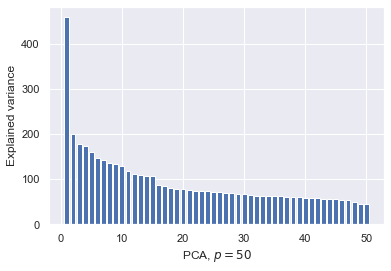

In [61]:
pca50.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca50.explained_variance_)+1),
    pca50.explained_variance_
    )
 
 
plt.xlabel(r'PCA, $p=50$')
plt.ylabel('Explained variance')
plt.show()

In [62]:
pca100 = PCA(n_components=100)

pca_features100 = pca100.fit_transform(X)
 
print('Shape before PCA: ', X.shape)
print('Shape after PCA: ', pca_features100.shape)

Shape before PCA:  (200000, 200)
Shape after PCA:  (200000, 100)


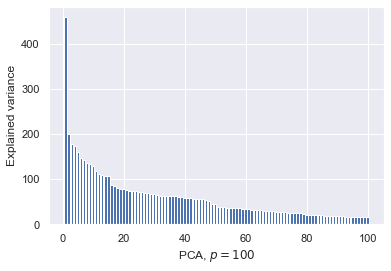

In [63]:
pca100.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca100.explained_variance_)+1),
    pca100.explained_variance_
    )
 
 
plt.xlabel(r'PCA, $p=100$')
plt.ylabel('Explained variance')
plt.show()

In [64]:
p20 = pca20.fit_transform(X)
p50 = pca50.fit_transform(X)
p100 = pca100.fit_transform(X)

In [65]:
cvs20 = cross_val_score(lr, p20, y, scoring="roc_auc", cv = 5)

In [66]:
cvs50 = cross_val_score(lr, p50, y, scoring="roc_auc", cv = 5)

In [67]:
cvs100 = cross_val_score(lr, p100, y, scoring="roc_auc", cv = 5)

In [71]:
mean_score = cvs20.mean()
std_score = cvs20.std()

print(mean_score)
print(std_score)

0.603922511169003
0.003724518558537093


In [72]:
mean_score = cvs50.mean()
std_score = cvs50.std()

print(mean_score)
print(std_score)

0.7050305033928159
0.0038261183647870893


In [73]:
mean_score = cvs100.mean()
std_score = cvs100.std()

print(mean_score)
print(std_score)

0.7757029504258659
0.00282990109505561


In [217]:
sls = np.load('2sls.npy')
Y = sls[0]
X = sls[1]
Z = sls[2]

In [218]:
import linearmodels as lm

m = sm.OLS(X,Z).fit()

m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.194
Model:                            OLS   Adj. R-squared (uncentered):              0.193
Method:                 Least Squares   F-statistic:                              239.9
Date:                Mon, 08 May 2023   Prob (F-statistic):                    1.19e-48
Time:                        19:43:19   Log-Likelihood:                         -1427.5
No. Observations:                1000   AIC:                                      2857.
Df Residuals:                     999   BIC:                                      2862.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4985      0.032     15.487      0.000       0.435       0.562
==============================================================================
Omnibus:                        0.777   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.655
Skew:                          -0.046   Prob(JB):                        0.721
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
m.params

array([0.49847622])

In [204]:
m.pvalues

array([1.19046284e-48])

In [205]:
m.tvalues

array([15.48731022])

In [206]:
m.bse

array([0.03218611])

In [220]:
xhat = m.predict(Z)

In [221]:
xh = sm.add_constant(xhat)

m2 = sm.OLS(Y,xh).fit()

m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     45.45
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.65e-11
Time:                        19:44:21   Log-Likelihood:                -1850.3
No. Observations:                1000   AIC:                             3705.
Df Residuals:                     998   BIC:                             3714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9219      0.049     18.910      0.000       0.826       1.018
x1             0.6650      0.099      6.742      0.000       0.471       0.859
==============================================================================
Omnibus:                        5.507   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.389
Skew:                          -0.175   Prob(JB):                       0.0676
Kurtosis:                       3.086   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
m2.params

array([0.92185613, 0.66503933])

In [223]:
m2.pvalues

array([2.11844846e-68, 2.64525083e-11])

In [224]:
m2.tvalues

array([18.90980383,  6.74165978])

In [225]:
m2.bse

array([0.04875017, 0.09864623])

In [227]:
Zi = sm.add_constant(Z)

m3 = sm.OLS(Y,Zi).fit()

m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     45.45
Date:                Mon, 08 May 2023   Prob (F-statistic):           2.65e-11
Time:                        19:45:31   Log-Likelihood:                -1850.3
No. Observations:                1000   AIC:                             3705.
Df Residuals:                     998   BIC:                             3714.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9219      0.049     18.910      0.000       0.826       1.018
x1             0.3315      0.049      6.742      0.000       0.235       0.428
==============================================================================
Omnibus:                        5.507   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.389
Skew:                          -0.175   Prob(JB):                       0.0676
Kurtosis:                       3.086   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
m3.params[1]

0.3315062938722091

In [229]:
m.params[0]

0.4984762202721605

In [230]:
m3.params[1] / m.params[0]

0.665039334657151